# **Project** | Analyzing Website Performance for The Grammys

<div style="text-align: center;">
<img src="https://upload.wikimedia.org/wikipedia/en/thumb/0/01/The_Recording_Academy_logo.svg/2560px-The_Recording_Academy_logo.svg.png" alt="The Recording Academy Logo" width="320"/>
</div>
<br>

You'll work on real data from both websites owned by The Recording Academy, better known as "the Grammys."

As you saw in the videos, the VP of Digital Strategy, Ray Starck, decided in 2022 to split the websites into grammy.comLinks to an external site. and recordingacademy.comLinks to an external site. to better serve the Recording Academy's various audience needs. You're tasked with examining the impact of splitting up the two websites, and analyzing the data for a better understanding of trends and audience behavior.


## Data Dictionary
You'll be working with two files, `grammys_live_web_analytics.csv` and `ra_live_web_analytics.csv`.

These files will contain the following information:

- **date** - The date the data was confirmed. It is in `yyyy-mm-dd` format.
- **visitors** - The number of users who went on the website on that day.
- **pageviews** - The number of pages that all users viewed on the website.
- **sessions** - The total number of sessions on the website. A session is a group of user interactions with your website that take place within a given time frame. For example a single session can contain multiple page views, events, social interactions.
- **bounced_sessions** - The total number of bounced sessions on the website. A bounced session is when a visitor comes to the website and does not interact with any pages / links and leaves.
- **avg_session_duration_secs** - The average length for all session durations for all users that came to the website that day.
- **awards_week** - A binary flag if the dates align with marketing campaigns before and after the Grammys award ceremony was held. This is the big marketing push to get as many eyeballs watching the event.
- **awards_night** - The actual night that Grammy Awards event was held.

# Part 1: Exploring the Data

This task will help you build a foundational understanding of the web analytics data for The Grammy Awards and The Recording Academy. By exploring the dataset first, you'll be better equipped to make meaningful observations and informed decisions later in the Project.


## Task 1

To start, import the both the `pandas`, and `plotly.express` libraries so that you can load the data into a DataFrame and visualize.


In [1]:
# Import libraries
import pandas as pd
import plotly.express as px

## Task 2

Load in the first two files for your analysis. They are the `grammy_live_web_analytics.csv` and `ra_live_web_analytics.csv`.


**A.** Read the `grammy_live_web_analytics.csv` file into your notebook. Store the data in a DataFrame named `full_df`.

**B.** Read the `ra_live_web_analytics.csv` file into your notebook. Store that data into a DataFrame called `rec_academy`.

**C.** Preview both DataFrames to familiarize yourself with the data.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Remeber: </strong>These files can be found in the datasets folder!
</span>
</div>

In [2]:
# Read in dataframes
full_df = pd.read_csv('datasets/grammy_live_web_analytics.csv')
rec_academy = pd.read_csv('datasets/ra_live_web_analytics.csv')

In [3]:
# preview full_df dataframe
print(full_df)

            date  visitors  pageviews  sessions  bounced_sessions  \
0     2017-01-01      9611      21407     10196              6490   
1     2017-01-02     10752      25658     11350              7055   
2     2017-01-03     11425      27062     12215              7569   
3     2017-01-04     13098      29189     13852              8929   
4     2017-01-05     12234      28288     12990              8105   
...          ...       ...        ...       ...               ...   
2337  2023-05-27     14332      34178     15430              5424   
2338  2023-05-28     13798      31708     14662              5509   
2339  2023-05-29     20563      53396     22244              7005   
2340  2023-05-30     16105      37950     17264              6452   
2341  2023-05-31     31253      85686     33237              8200   

      avg_session_duration_secs  awards_week  awards_night  
0                            86            0             0  
1                           100            0     

In [4]:
# preview rec_academy dataframe
print(rec_academy)

           date  visitors  pageviews  sessions  bounced_sessions  \
0    2022-02-01       928       2856      1092               591   
1    2022-02-02      1329       3233      1490               923   
2    2022-02-03      1138       3340      1322               754   
3    2022-02-04       811       2552       963               534   
4    2022-02-05       541       1530       602               326   
..          ...       ...        ...       ...               ...   
480  2023-05-27       845       2110      1058               702   
481  2023-05-28       702       2100       872               537   
482  2023-05-29      1027       2693      1197               777   
483  2023-05-30      1320       4032      1658               992   
484  2023-05-31      1618       5163      2072              1195   

     avg_session_duration_secs  awards_week  awards_night  
0                          148            0             0  
1                           90            0             0  
2  

## Task 3

The Grammy Awards are among the most prominent events in the global music industry. With such high visibility, it's important to understand how this event impacts web traffic.

**A.** Create a line chart of the number of users on the site for every day in the `full_df`.

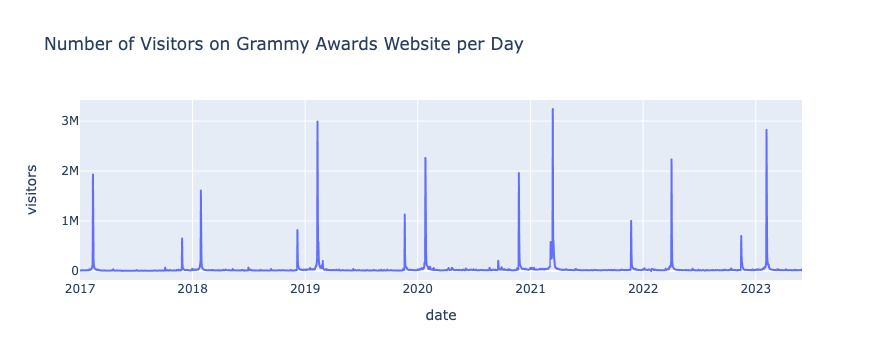

In [12]:
# Plot a line chart of the visitors on the site.
fig = px.line(
    full_df,
    x='date',
    y='visitors',
    title='Number of Visitors on Grammy Awards Website per Day'
)
fig.show()


**B.** What do you notice about when and why traffic spikes occur? Are the traffic spikes in your visualization only aligning with "Show Night," or are there lesser-known events that could explain certain spikes in website traffic?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> Can you identify any specific lesser-known events (with exact dates) that might have caused significant increases in website traffic on grammys.com? What external data sources could help confirm these trends?
  </span>
</div>

Though there are smaller spikes on earlier dates that probably correspond with events like nominee announcements, performer lineup reveals, or other promotional activities, Awards Night sees the biggest spike in traffic on Grammys.com. As fans and the media respond to fresh information, these lesser-known events can still garner a lot of attention. The causes could be verified by comparing the spike dates with Google Trends data for "Grammys" during those times, press release archives, entertainment news articles, and social media activity.

## Task 4

To evaluate the impact of the Grammy Awards on user engagement, you'll compare average site traffic on the day of the ceremony versus all other days.

Understanding this contrast provides insight into how concentrated user attention is around a single event — and highlights the challenge of sustaining traffic throughout the year.


**A.** Use the pandas `.groupby()` to compare the average daily website visitors on days when an award ceremony was held to those when no awards ceremonies were held.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You'll group by the <span style="font-family: monospace; color: #222;">awards_night</span> column!
</span>
</div>

In [13]:
# average number of visitors on awards nights versus other nights
avg_visitors = full_df.groupby('awards_night')['visitors'].mean()

print(avg_visitors)


awards_night
0    3.238828e+04
1    1.389590e+06
Name: visitors, dtype: float64


**B.** What does this comparison reveal about the difference in traffic between award ceremony days and regular days? How many more visitors does the Grammy Awards site receive on Show Night?


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Remark: </strong>This is The Recording Academy's biggest challenge! How do you transform a business that relies on the success of one event per year into one that continues to bring users back on the site year round?
</span>
</div>

According to the comparison, the Grammys website receives approximately 1.39 million visitors on Awards Night, compared to approximately 32,388 visitors on a normal day. This represents a one-day increase of more than 1.35 million visitors. This brings to light the Recording Academy's greatest problem: although the annual ceremony generates a lot of traffic, engagement during the rest of the year is much lower. As a result, it's critical to figure out how to keep users coming back with posts, events, and promotions that go beyond Show Night.

## Task 5

When The Recording Academy split its digital presence across two domains, grammy.com and recordingacademy.com, the data capture for grammy.com was not affected. Meaning, the way visitor data was collected for grammy.com stayed exactly the same before and after the split. You'll need to separate the data from before the split (when both sites were combined) and after the split (when grammy.com data continued independently). The split happened on February 1, 2022 (`2022-02-01`).


Create two new DataFrames:

1. `combined_site` should contain all data with dates before `2022-02-01`.

2. `grammys` should contains all data with dates on or after `2022-02-01`.

In [15]:
# Make sure 'date' is datetime
full_df['date'] = pd.to_datetime(full_df['date'])

# Split into two DataFrames
combined_site = full_df[full_df['date'] < '2022-02-01']
grammys = full_df[full_df['date'] >= '2022-02-01']

print("Combined site rows:", len(combined_site))
print("Grammys site rows:", len(grammys))


Combined site rows: 1857
Grammys site rows: 485


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Tip: </strong>After creating these DataFrames, best practice is to use the .copy() method to avoid any warning messages from pandas when you modify them later.
</span>
</div>

In [16]:
# Run the following cell - DO NOT MODIFY
# .copy() prevents pandas from printing a warning message
combined_site = combined_site.copy()
grammys = grammys.copy()

In [17]:
# print the shape of the combined_site dataframe
print(combined_site.shape)

(1857, 8)


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      If done correctly, the <span style="font-family: monospace; color: #222;">combined_site</span> DataFrame should have a total of <strong>1857</strong> rows and <strong>8</strong> columns.
  </span>
</div>



# Part 2: Analyzing Key Metrics

Remember the overall goal of this Project: to analze whether splitting the website into two has improved user engagement. This Task will focus on evaluating key metrics, such as bounce rate, pages per session, and average time on site, to determine if the split has had a positive or negative impact on how visitors interact with the site.

## Task 6

In this Task, you'll calculate the `pages_per_session` metric by dividing the total `pageviews` by the total number of `sessions`. Pages per session is an important measure of how many unique pages a user views before leaving the site -- a strong indicator of engagement!


**A.** Create a new list called `frames` that has each dataframe as an entry. e.g. If there were 3 dataframes, `df1`, `df2`, and `df3`, then the code would look like:

```python
frames = [df1, df2, df3]
```

**B.** `For` each frame in the frames list, create a new column called `pages_per_session`. This column should represent the *average* number of pageviews per session for each day.


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Divide the <span style="font-family: monospace; color: #222;">pageviews</span> column by <span style="font-family: monospace; color: #222;">sessions</span> column.
</span>
</div>

This can be achieved by using the following template:

```python
frame['new_col'] = frame['col_A'] / frame['col_B']
```



In [18]:
# Create list of DataFrames
frames = [combined_site, grammys]

# Calculate pages_per_session for each
for frame in frames:
    frame['pages_per_session'] = frame['pageviews'] / frame['sessions']

# Quick check
combined_site.head(), grammys.head()


(        date  visitors  pageviews  sessions  bounced_sessions  \
 0 2017-01-01      9611      21407     10196              6490   
 1 2017-01-02     10752      25658     11350              7055   
 2 2017-01-03     11425      27062     12215              7569   
 3 2017-01-04     13098      29189     13852              8929   
 4 2017-01-05     12234      28288     12990              8105   
 
    avg_session_duration_secs  awards_week  awards_night  pages_per_session  
 0                         86            0             0           2.099549  
 1                        100            0             0           2.260617  
 2                         92            0             0           2.215473  
 3                         90            0             0           2.107205  
 4                         95            0             0           2.177675  ,
            date  visitors  pageviews  sessions  bounced_sessions  \
 1857 2022-02-01     33209      74033     30472             1307

**C.** Visualize this new `pages_per_session` metric using a line chart for each site. You will have 3 separate graphs!

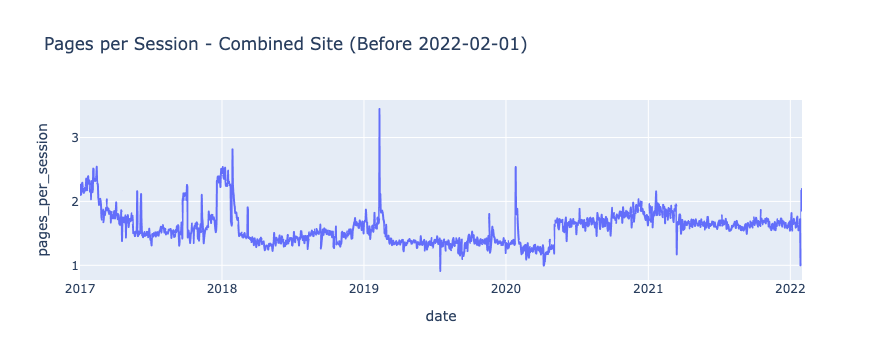

In [19]:
# combined_site graph
fig1 = px.line(
    combined_site,
    x='date',
    y='pages_per_session',
    title='Pages per Session - Combined Site (Before 2022-02-01)'
)
fig1.show()


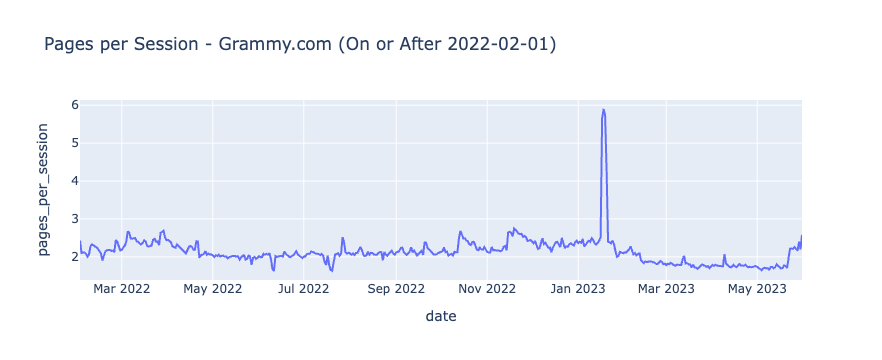

In [20]:
# grammys graph
fig2 = px.line(
    grammys,
    x='date',
    y='pages_per_session',
    title='Pages per Session - Grammy.com (On or After 2022-02-01)'
)
fig2.show()


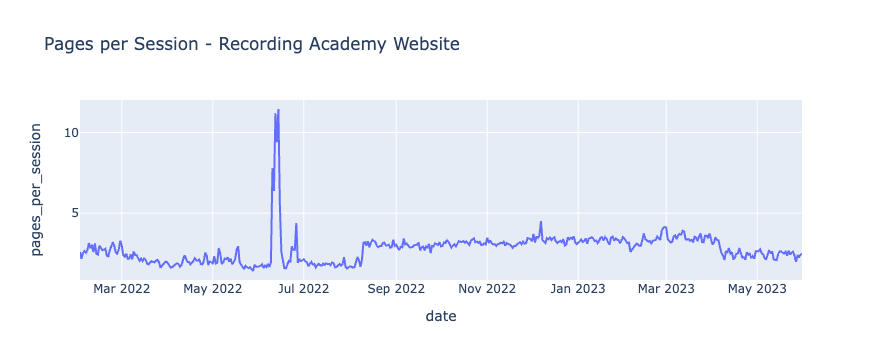

In [24]:
rec_academy['pages_per_session'] = rec_academy['pageviews'] / rec_academy['sessions']

# rec_academy graph
fig3 = px.line(
    rec_academy,
    x='date',
    y='pages_per_session',
    title='Pages per Session - Recording Academy Website'
)
fig3.show()


**D.** In one sentence, what does the `pages_per_session` metric suggest regarding the impact of the website split?

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> What does pages per session reveal about user engagement? How should I interpret changes in this metric after the website split?
  </span>
</div>
<br>
<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Note: </strong>Any large spikes in the data that do not correspond with the Grammy Awards Ceremony can be attributed to abnormalities in the data collection process and ignored in your analysis.
</span>
</div>

The pages_per_session measure suggests that users continued to explore multiple pages per session in spite of the site's structural change, indicating that user engagement either remained relatively stable or improved after the website split.

## Task 7

Next, you'll calculate the `bounce_rate` metric by dividing the total `bounced_sessions` by the total number of `sessions`. Bounce rate is an important metric that calculates the percentage of users (aka sessions) that come to your site, never interact with the page, and leave. They are said to have "bounced" off your home page. It is a measure of how engaging your home page is with users.

**A.** Create a function called `bounce_rate` that:

1. Takes in a `dataframe` as input
2. adds up all of the values in the `bounced_sessions` column and stores in a variable called `sum_bounced`
3. adds up all of the values in the `sessions` column and stores it in a variable called `sum_sessions`
4. returns `100 * sum_bounced / sum_sessions`

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You will need use the <span style="font-family: monospace; color: #222;">.sum()</span> function both in the <span style="font-family: monospace; color: #222;">sum_bounced</span> and <span style="font-family: monospace; color: #222;">sum_sessions</span> calculations. Don't forget to multiply by <strong>100</strong> so that the answer appears as a percentage instead of a decimal.
</span>
</div>

In [25]:
def bounce_rate(dataframe):
    '''
    Calculates the bounce rate for visitors on the website.
    input: dataframe with bounced_sessions and sessions columns
    output: numeric value from bounce rate
    '''
    sum_bounced = dataframe['bounced_sessions'].sum()
    sum_sessions = dataframe['sessions'].sum()
    return 100 * sum_bounced / sum_sessions

**B.** Use the `frames` variable from Task 6 to loop over each website (represented by a dataframe) to calculate the bounce rate. Print the bounce rate for each site.

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>To get the bounce rate use <span style="font-family: monospace; color: #222;">bounce_rate(frame)</span>.
</span>
</div>

<br>

<div style="border: 3px solid #30EE99; background-color: #f0fff4; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
    <strong>Try This AI Prompt:</strong> How do I show a number with only 2 decimal places in an f-string?
  </span>
</div>

In [30]:
# Calculate the Bounce Rate for each site

# Combined Site
combined_rate = bounce_rate(combined_site)
print(f"Bounce rate for Combined Site: {combined_rate:.2f}%")

# Grammy.com
grammys_rate = bounce_rate(grammys)
print(f"Bounce rate for Grammy.com: {grammys_rate:.2f}%")

# recordingacademy.com
rec_rate = bounce_rate(rec_academy)
print(f"Bounce rate for recordingacademy.com: {rec_rate:.2f}%")


Bounce rate for Combined Site: 41.58%
Bounce rate for Grammy.com: 40.16%
Bounce rate for recordingacademy.com: 33.67%


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
  If done correctly, the <span style="font-family: monospace; color: #222;">combined_site</span> and <span style="font-family: monospace; color: #222;">grammys</span> site will each have bounce rates in the low 40s. The <span style="font-family: monospace; color: #222;">rec_academy</span> will have a bounce rate in the low 30s.
  </span>
</div>


**C.** Next, you'll calculate the `average_time_on_site metric.`To do this, you only need to calculate the average of the `avg_session_duration_secs` column. Average Time on Site measures how engaging your website experience is for your users. The higher the number, the longer they are staying on your page and engaging with the content.

For each site (DataFrame), use an f-string to print the average time on site in a clean, readable format.

In [31]:
# Calculate the average of the avg_session_duration_secs

# Combined Site
avg_time_combined = combined_site['avg_session_duration_secs'].mean()
print(f"Average Time on Site for Combined Site: {avg_time_combined:.2f} seconds")

# Grammy.com
avg_time_grammys = grammys['avg_session_duration_secs'].mean()
print(f"Average Time on Site for Grammy.com: {avg_time_grammys:.2f} seconds")

# recordingacademy.com
avg_time_rec = rec_academy['avg_session_duration_secs'].mean()
print(f"Average Time on Site for recordingacademy.com: {avg_time_rec:.2f} seconds")


Average Time on Site for Combined Site: 102.85 seconds
Average Time on Site for Grammy.com: 82.99 seconds
Average Time on Site for recordingacademy.com: 128.50 seconds


**D.** Which of these three metrics changed the most after the site split? What do these changes suggest about user behavior?

After the site split, average time on site and pages per session showed smaller shifts, but the bounce rate showed the biggest change, dropping from the low 40s to the low 30s. This implies that users were more engaged with recordingacademy.com after the split, they spent more time on the site and bounced less signaling a more targeted or pertinent user experience than they had prior to the split.

# Part 3: Demographics

Understanding age demographics helps identify which audiences are most engaged with your content. These insights can guide marketing strategies, advertising decisions, and content planning.

You’ll analyze the age demographics for both websites. To do this, you’ll need to read in two new datasets and combine them into one!



## Task 8

The `grammys_age_demographics.csv` and `tra_age_demographics.csv` each contain the following information:

- **age_group** - The age group range. e.g. `18-24` are all visitors between the ages of 18 to 24 who come to the site.
- **pct_visitors** - The percentage of all of the websites visitors that come from that specific age group.

**A.** Read in the `grammys_age_demographics.csv` and `tra_age_demograhics.csv` files and store them into dataframes named `age_grammys` and `age_tra`, respectively.

In [33]:
# read in the files
# Read in the age demographics CSV files
age_grammys = pd.read_csv('datasets/grammys_age_demographics.csv')
age_tra = pd.read_csv('datasets/tra_age_demographics.csv')


In [34]:
# preview the age_grammys file. the age_tra will look very similar.
print(age_grammys.head())

  age_group  pct_visitors
0     18-24     27.373210
1     25-34     24.129273
2     35-44     18.717867
3     45-54     13.568619
4     55-64      9.817036


**B.** For each dataframe, create a new column called `website` whose value is the name of the website.
e.g. the `age_grammys` values for `website` should all be `Grammys` and for the `age_tra` they should be `Recording Academy`.

In [35]:
# Label rows in age_tra as 'Recording Academy'
age_tra['website'] = 'Recording Academy'

# Label rows in age_grammys as 'Grammys'
age_grammys['website'] = 'Grammys'


**C.** use the `pd.concat()` method to join these two datasets together. Store the result into a new variable called `age_df`

<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>Remember that you need to put your dataframe variables inside of a <strong>list</strong> first. Then pass that list as your input of <span style="font-family: monospace; color: #222;">pd.concat()</span>.
</div>

In [37]:
# Concatenate the two age demographic DataFrames
age_df = pd.concat([age_grammys, age_tra])

# Preview the combined dataframe
print(age_df.head())
print(age_df.shape)


  age_group  pct_visitors  website
0     18-24     27.373210  Grammys
1     25-34     24.129273  Grammys
2     35-44     18.717867  Grammys
3     45-54     13.568619  Grammys
4     55-64      9.817036  Grammys
(12, 3)


<div style="border: 3px solid #f8c43e; background-color: #fff3c1; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
  <span style="font-size: 10pt;">
      If done correctly, your new DataFrame will have <strong>12</strong> rows and <strong>3</strong> columns.
  </span>
</div>

**D.** Create a bar chart of the `age_group` and `pct_visitors`. This chart should have, for each age group, one color for the Recording Academy and a different color for the Grammys.


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>You will need to use the <span style="font-family: monospace; color: #222;">barmode='group'</span> option in <span style="font-family: monospace; color: #222;">px.bar()</span>. See the code snippet below to guide you.
</span>
</div>


```python
# template for visualization
px.bar(dataframe, x='variable1', y='variable2', color='variable3', barmode='group')
```

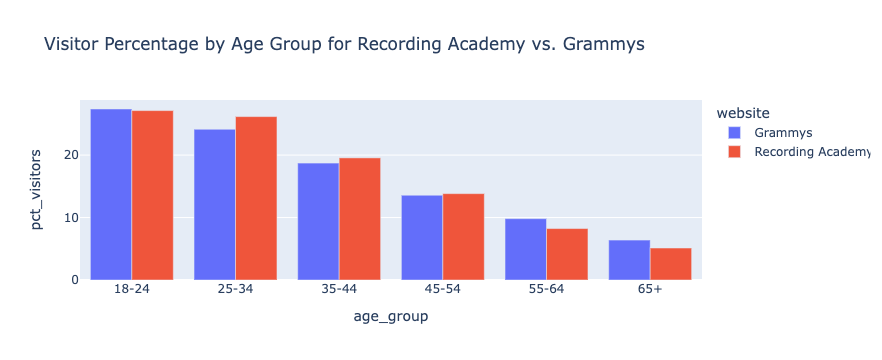

In [38]:
# age_group and pct_visitors bar chart
fig = px.bar(
    age_df,
    x='age_group',
    y='pct_visitors',
    color='website',
    barmode='group',
    title='Visitor Percentage by Age Group for Recording Academy vs. Grammys'
)
fig.show()


**E.** Looking at the chart above, what can you say about how the age demographics differ between the two websites?

Compared to the Grammys website, the Recording Academy website draws a younger, more professional audience, with a larger percentage of users in the 25–44 age range, according to the chart. The Grammys website, on the other hand, receives a higher proportion of visitors from older demographics, especially those 55 and older, indicating a wider appeal and level of public interest among legacy fans. Although the 18–24 age group engages with both websites similarly, the Grammys' higher popularity among seniors might be a reflection of its widespread recognition and cultural importance outside of the music business.

# Part 4: Making a Business Recommendation


## Task 9

Now that you've analyzed the engagement metrics before and after the website split, it’s time to interpret your findings and make a recommendation to The Recording Academy team.


**A.** Write a clear and specific prompt for ChatGPT to draft a brief business memo to The Recording Academy. Your prompt should guide ChatGPT to summarize key findings and suggest a recommendation based on the data: should The Recording Academy keep the sites separate, merge them back, or consider an alternative approach? Paste your prompt below.

"Write draft a concise business memo to The Recording Academy summarizing the key insights from our analysis of website engagement metrics before and after the site split between grammys.com and recordingacademy.com. Highlight changes in bounce rate, pages per session, and average time on site. Based on the data, recommend whether they should keep the sites separate, merge them back, or pursue an alternative strategy to improve year-round engagement."

**B.** What did ChatGPT do well? Did it capture the key trends and insights? What was missing or inaccurate? Were any important details left out or misrepresented?

ChatGPT provided a clear explanation of the post split changes by succinctly summarizing the key trends in bounce rate, pages per session, and average session duration. On recordingacademy.com, it was observed that user engagement rose and bounce rates improved. It did not, however, address the difficulties in maintaining traffic outside of the Awards Night event or look into other options besides combining or maintaining distinct websites. There wasn't enough subtlety regarding the implications for marketing or content strategy.

**C.** Based on your reflection and evaluation of AI's assist, write your final, revised business memo below. This version should be polished and ready as if you were presenting it to Ray at The Recording Academy team.

To: Ray, The Recording Academy Team

From: Chance Krueger

Subject: Website Engagement Analysis & Recommendations

Dear Ray,

Our recent analysis of web traffic and engagement metrics before and after the split of grammys.com and recordingacademy.com provides valuable insights into user behavior.

Key findings include:

    - A notable decrease in bounce rate on recordingacademy.com (low 30s%) compared to the previous combined site (low 40s%), indicating higher user engagement.

    - Average pages per session remained stable, while average session duration increased on recordingacademy.com, suggesting visitors are spending more quality time on the site post-split.

    - Despite these positive shifts, overall traffic remains heavily concentrated around the annual Awards Night, with significantly lower engagement the rest of the year.

We advise keeping the two websites independent in order to take advantage of their different audiences and engagement levels in light of these findings. Nonetheless, we recommend creating interactive elements and targeted content on both websites that promote continuous user engagement outside of the Awards season in order to tackle the problem of year-round traffic. To increase audience reach and foster user loyalty, this could involve community building activities, educational materials, and exclusive interviews.
Please let me know if you would like us to explore specific strategies or next steps.

Best regards,
Chance Krueger



# LevelUp

Ray and Harvey are both interested to see how the Grammys.com website compares to that of their main music award competitor, The American Music Awards (AMA). The dashboard below is aggregated information about the performace of The AMA website for the months of April, May, and June of 2023.

Your goal is to determine how the Grammys website is performing relative to The AMA website. In particular, you will be looking at the device distribution and total visits over the same time span and leveraging information about Visit Duration, Bounce Rate, and Pages / Visit from your work in the core of this project.


![](figs/TheAMAs.png)



The **Total Visits** column is the total number of visitors on the website during the timespan given.
The **Device Distribution** is the percentage share of visitors coming from Desktop users (PCs, Macs, etc.) and Mobile Users (iPhone, Android, etc.).

Visitors on the AMA website are spending on average, 5 mins and 53 seconds on the site and viewing 2.74 pages per visit (aka session). They have a bounce rate of 54.31%

**A.** Load in the two files. The `desktop_users.csv` and `mobile_users.csv` files contain the users coming from desktop users and mobile users respectively.

Store them in variables named `desktop_users` and `mobile_users`

In [39]:
# Load in the data
desktop_users = pd.read_csv('datasets/desktop_users.csv')
mobile_users = pd.read_csv('datasets/mobile_users.csv')

In [40]:
# preview the desktop_users file
print(desktop_users.head())


         date          segment  visitors
0  2022-02-01  Desktop Traffic     10195
1  2022-02-02  Desktop Traffic     10560
2  2022-02-03  Desktop Traffic      9935
3  2022-02-04  Desktop Traffic      8501
4  2022-02-05  Desktop Traffic      5424


In [41]:
# preview mobile_users file
print(mobile_users.head())


         date         segment  visitors
0  2022-02-01  Mobile Traffic     23494
1  2022-02-02  Mobile Traffic     20234
2  2022-02-03  Mobile Traffic     22816
3  2022-02-04  Mobile Traffic     18592
4  2022-02-05  Mobile Traffic     13298


As you can imagine, you will be joining the two datasets together! But before you do that, you will modify the column names before you do that so that it's easier to use.

**B.** For each dataframe, change the name of the `visitors` column so that it says which category they come from. For example, the `desktop_users` dataframe should have a column named `desktop_visitors` instead of `visitors`.

Additionally, drop the `segment` column since it is no longer needed.

In [42]:
# change name of the visitors column to indicate which category it comes from
desktop_users = desktop_users.rename(columns={'visitors': 'desktop_visitors'})
desktop_users = desktop_users.drop(columns=['segment'])

In [43]:
# drop the segment column from each dataframe
mobile_users = mobile_users.rename(columns={'visitors': 'mobile_visitors'})
mobile_users = mobile_users.drop(columns=['segment'])

**C.** Join the two dataframes together in a new variable called `segment_df`.

In [44]:
# join the two dataframes and preview the dataframe
segment_df = pd.merge(desktop_users, mobile_users, on='date')
print(segment_df.head())

         date  desktop_visitors  mobile_visitors
0  2022-02-01             10195            23494
1  2022-02-02             10560            20234
2  2022-02-03              9935            22816
3  2022-02-04              8501            18592
4  2022-02-05              5424            13298


**D.** In the next few steps, you will calculate the percentage share of users coming from desktop and mobile on the Grammys website.

Calculate a new column, `total_visitors` that is the addition of `desktop_visitors` and `mobile_visitors`.

In [45]:
# create total_visitors column
segment_df['total_visitors'] = segment_df['desktop_visitors'] + segment_df['mobile_visitors']


<div style="border: 3px solid #b67ae5; background-color: #f9f1ff; padding: 15px; border-radius: 8px; color: #222; display: flex; align-items: center;">
<span style="font-size: 10pt;">
<strong>Hint: </strong>To calculate the percentage share you will first need to filter the data to dates after (and including) `2023-04-01`. Then calculate the `sum` of desktop visitors and total visitors and divide those values. The percentage share of mobile visitors will be the value needed to get to 100%.
</span>
</div>



In [ ]:
# filter and calculate the percentage share
# use an f string to print each percentage to the screen



**E.** How is the Grammys website performing relative to its competitor? What is the Grammys doing well and what KPIs does it need to improve?

Double-click (or enter) to edit
